In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
df = pd.read_csv('final_merge.csv')

In [3]:
df.shape

(1007807, 35)

In [4]:
df.columns

Index(['Unnamed: 0', 'song_hotttnesss', 'song_id', 'artist_latitude',
       'artist_location', 'artist_longitude', 'track_id', 'loudness_x',
       'mode_x', 'tempo_x', 'key_x', 'genre1_cd2c', 'genre2_cd2c',
       'genre1_cd2', 'genre2_cd2', 'genre1_cd1', 'genre2_cd1', 'artist_id',
       'duration', 'artist_hotttnesss', 'year', 'danceability', 'energy',
       'key_y', 'loudness_y', 'mode_y', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo_y', 'duration_ms',
       'track_popularity', 'album_release'],
      dtype='object')

In [5]:
df.columns.values[0] = 'id'
df.head()

,id,song_hotttnesss,song_id,artist_latitude,artist_location,artist_longitude,track_id,loudness_x,mode_x,tempo_x,...,mode_y,speechiness,acousticness,instrumentalness,liveness,valence,tempo_y,duration_ms,track_popularity,album_release
0,0,0.542899,SOQMMHC12AB0180CB8,NaN,NaN,NaN,TRMMMYQ128F932D901,-4.829,0,87.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.299877,SOVFVAK12A8C1350D9,NaN,NaN,NaN,TRMMMKD128F425225D,-10.555,1,150.778,...,1.0,0.0462,0.002230,0.090,0.0869,0.880,149.971,157933.0,1.0,1995.0
2,2,0.617871,SOGTUKN12AB017F4F1,55.8578,"Glasgow, Scotland",-4.24251,TRMMMRX128F93187D9,-2.060,1,177.768,...,NaN,0.0662,0.000045,0.952,0.3430,0.621,177.745,138960.0,18.0,2009.0
3,3,NaN,SOBNYVR12A8C13558C,NaN,NaN,NaN,TRMMMCH128F425532C,-4.654,1,87.433,...,1.0,0.1470,0.130000,NaN,0.1150,0.962,174.013,145032.0,0.0,2003.0
4,4,NaN,SOHSBXH12A8C13B0DF,NaN,NaN,NaN,TRMMMWA128F426B589,-7.806,0,140.035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2 = df[(pd.isnull(df.genre1_cd1) == False) | (pd.isnull(df.genre1_cd2) == False) | (pd.isnull(df.genre1_cd2c) == False)]

In [7]:
df2_year = df2.groupby(['year']).size().reset_index(name='counts')

First we check the number of song per year we have in the dataset. As waited we see an increase in the number of songs over the year except for 2010, this probably because the year 2010 was just beginning when the dataset has been created.

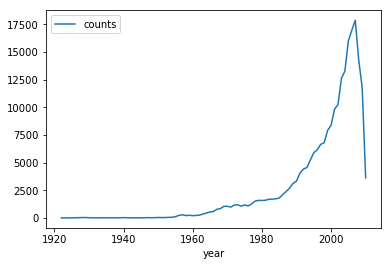

In [8]:
df2_year.iloc[1:, :].plot(x='year', y='counts', kind='line')

In [9]:
genres = set([])
genres_cols = ['genre1_cd2c', 'genre2_cd2c', 'genre1_cd2', 'genre2_cd2', 'genre1_cd1', 'genre2_cd1']
for col_name in genres_cols:
    genres = genres | set(df2[col_name].unique())
print(genres)
print(len(genres))

{nan, 'Pop', 'Punk', 'Rock', 'Country', nan, 'Pop_Rock', 'Metal', 'RnB', 'Folk', 'Electronic', 'Vocal', 'New Age', 'Rap', 'Latin', 'International', 'World', 'Reggae', 'Jazz', 'Blues'}
20


We have 17 different genres(nan are unkown and international is the same as World). To do a meaningful analysis of the genre analysis over the year a minimum amount of songs of the type analysed must be in the dataset. In the following cells we first replace the nan, only replace International by World. 

In [10]:
df2[genres_cols] = df2[genres_cols].fillna('Unknown')
df2[genres_cols] = df2[genres_cols].replace('International', 'World')

/Users/antoinewehenkel/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [11]:
genres = set([])
genres_cols = ['genre1_cd2c', 'genre2_cd2c', 'genre1_cd2', 'genre2_cd2', 'genre1_cd1', 'genre2_cd1']
for col_name in genres_cols:
    genres = genres | set(df2[col_name].unique())
    df2[col_name] = df2[col_name].astype(str)
print(genres)
print(len(genres))

/Users/antoinewehenkel/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


{'Pop', 'Punk', 'Pop_Rock', 'Rock', 'Country', 'Metal', 'RnB', 'Folk', 'Electronic', 'Vocal', 'New Age', 'Rap', 'Unknown', 'Latin', 'World', 'Reggae', 'Jazz', 'Blues'}
18


In [12]:
df2[genres_cols].head()

,genre1_cd2c,genre2_cd2c,genre1_cd2,genre2_cd2,genre1_cd1,genre2_cd1
2,Unknown,Unknown,Electronic,Rap,Electronic,Rap
11,Latin,Unknown,Latin,Unknown,Unknown,Unknown
14,World,Unknown,World,Unknown,Unknown,Unknown
15,Pop,Unknown,Pop,Unknown,Unknown,Unknown
17,Unknown,Unknown,Rock,Metal,Unknown,Unknown


For the moment we have 6 columns for the genres, we would like to see if we can summarize these columns in one or two columns.
First we perform a pivot and count the number of different values there is in each column. 

In [13]:
for genre in list(genres):
    df2[genre] = 0
    for col_name in genres_cols:
        df2.loc[df2[col_name] == genre, genre] = 1
df2 = df2.drop(columns=['Unknown'])
genres.remove('Unknown')

/Users/antoinewehenkel/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/antoinewehenkel/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
df2['nb_genre'] = np.sum(df2.iloc[:, -17:].values, axis=1)

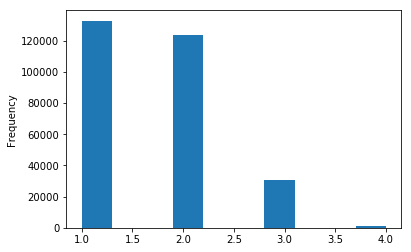

In [15]:
df2['nb_genre'].plot(kind='hist')

So we see that majority of the songs have 1 or 2 different genre, some also have 3 genres whereas 4 genres is attypical. We can now drop the 6 columns containing the label genres.

In [16]:
df2 = df2.drop(columns=genres_cols)

Now for each genre we plot how the number of sample per year.

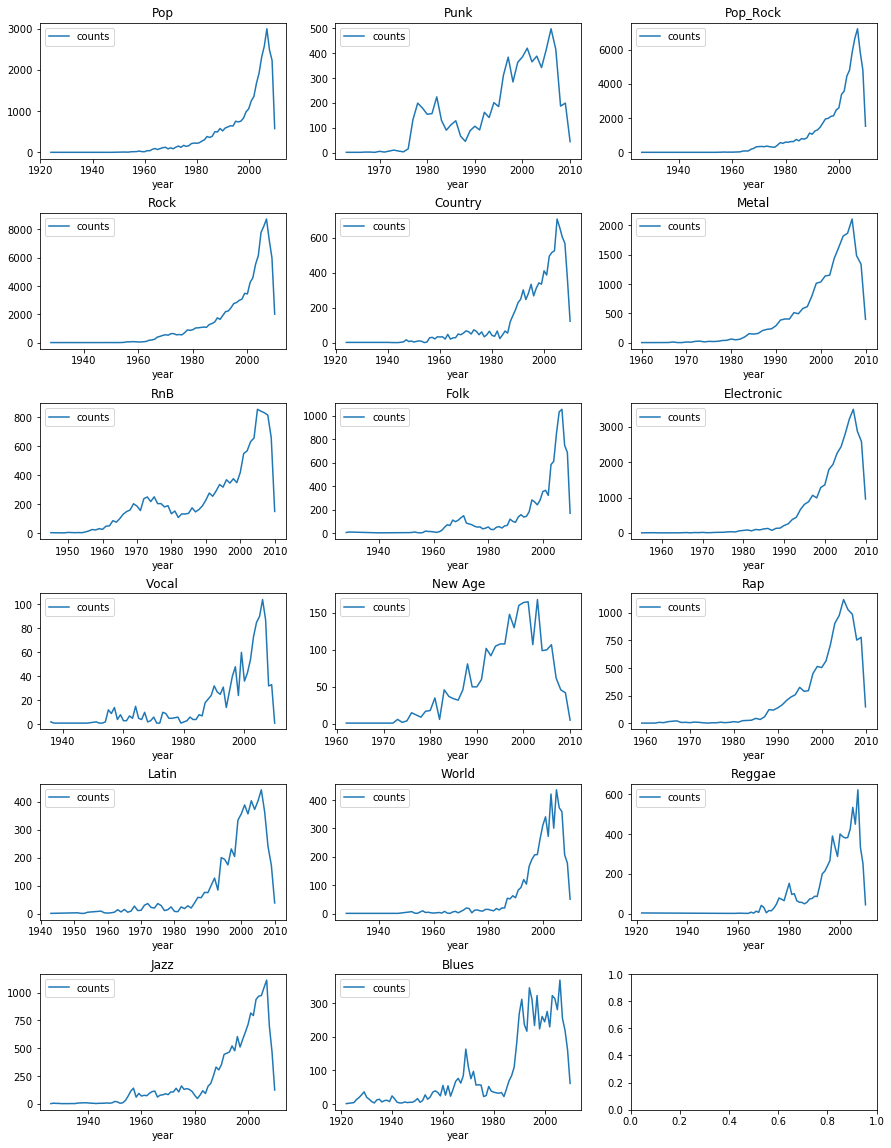

In [17]:
int(len(list(genres))/3.0 + .5)
f, axarr = plt.subplots(int(len(list(genres))/3.0 + .5), 3)
f.set_size_inches(15, 20)
plt.subplots_adjust(hspace=.4)
i = 0
for genre in genres:
    df2[df2[genre] == 1].groupby(['year']).size().reset_index(name='counts').iloc[1:, :]\
    .plot(x='year', y='counts', kind='line', title=genre, ax=axarr[int(i/3), i%3])
    i+=1

These plots are useful to see the data we have in our hands. 

Firstly we observe that most of the music we have is rock, pop, pop_rock, electronic or metal. On the opposite World, Latin, blues are not very represented. This can be explained whether because the dataset is biased but also because some genre are more popular. Indeed Latin music is sub-represented although there is a very important latin culture in the world. These observation could be made more precise by using only the total number of song of each genre.

Secondly these plots makes us able to see some trends in the evolution of the music. If we suppose the dataset is not to much biased for the genre well represented we can make some interesting observations. We can see that punk music suddenly appears in the middle of the 70's. Rock started in the 60's and grows exponentially since this moment. Indeed these plot are useful to tell something about when the genre appears and how it has evoluated since this moment. 

Finally I would like to point that these plot must be taken with care, indeed we need to double check if the number of music has really a tendency to grow exponentially with year or it is the way the dataset has been created which make us think that.

Now we want to look how genre are connected, so let's construct a graph in which nodes are the genre and connection between genre appears when a song has both genre, the weight of the connection is given by the number of songs.

In [41]:
adj_mat_genres = np.zeros([len(genres), len(genres)])
genres = list(genres)
for i in range(len(genres)):
    for j in range(i, len(genres)):
        nb_songs = df2[(df2[genres[i]] == 1) & (df2[genres[j]] == 1)].shape[0]
        adj_mat_genres[i, j] = nb_songs
        adj_mat_genres[j, i] = nb_songs

adj_mat_genres

In [42]:
adj_df = pd.DataFrame(adj_mat_genres, columns=genres)

In [43]:
adj_df['genre'] = genres

In [44]:
adj_df['radius'] = (np.diag(adj_mat_genres))**.5
adj_df['id'] = range(len(adj_df))

In [45]:
adj_df[['radius', 'id', 'genre']].T.to_dict().values()

dict_values([{'genre': 'Pop', 'radius': 203.51412727375956, 'id': 0}, {'genre': 'Punk', 'radius': 96.39502061828712, 'id': 1}, {'genre': 'Pop_Rock', 'radius': 305.89867603505576, 'id': 2}, {'genre': 'Rock', 'radius': 366.6619696668854, 'id': 3}, {'genre': 'Country', 'radius': 117.21348045340177, 'id': 4}, {'genre': 'Metal', 'radius': 162.85269417482783, 'id': 5}, {'genre': 'RnB', 'radius': 139.57435294494474, 'id': 6}, {'genre': 'Folk', 'radius': 114.20157617125956, 'id': 7}, {'genre': 'Electronic', 'radius': 204.53850493244542, 'id': 8}, {'genre': 'Vocal', 'radius': 38.961519477556315, 'id': 9}, {'genre': 'New Age', 'radius': 58.54912467321779, 'id': 10}, {'genre': 'Rap', 'radius': 127.68320171424274, 'id': 11}, {'genre': 'Latin', 'radius': 92.8654941299512, 'id': 12}, {'genre': 'World', 'radius': 84.11896337925236, 'id': 13}, {'genre': 'Reggae', 'radius': 105.28057750601485, 'id': 14}, {'genre': 'Jazz', 'radius': 155.80115532305913, 'id': 15}, {'genre': 'Blues', 'radius': 105.9905656

In [37]:
import json
a = adj_df[['radius', 'id', 'genre']].T.to_dict().values()
list(a)

[{'genre': 'Pop', 'id': 0, 'radius': 203.51412727375956},
 {'genre': 'Punk', 'id': 1, 'radius': 96.39502061828712},
 {'genre': 'Pop_Rock', 'id': 2, 'radius': 305.89867603505576},
 {'genre': 'Rock', 'id': 3, 'radius': 366.6619696668854},
 {'genre': 'Country', 'id': 4, 'radius': 117.21348045340177},
 {'genre': 'Metal', 'id': 5, 'radius': 162.85269417482783},
 {'genre': 'RnB', 'id': 6, 'radius': 139.57435294494474},
 {'genre': 'Folk', 'id': 7, 'radius': 114.20157617125956},
 {'genre': 'Electronic', 'id': 8, 'radius': 204.53850493244542},
 {'genre': 'Vocal', 'id': 9, 'radius': 38.961519477556315},
 {'genre': 'New Age', 'id': 10, 'radius': 58.54912467321779},
 {'genre': 'Rap', 'id': 11, 'radius': 127.68320171424274},
 {'genre': 'Latin', 'id': 12, 'radius': 92.8654941299512},
 {'genre': 'World', 'id': 13, 'radius': 84.11896337925236},
 {'genre': 'Reggae', 'id': 14, 'radius': 105.28057750601485},
 {'genre': 'Jazz', 'id': 15, 'radius': 155.80115532305913},
 {'genre': 'Blues', 'id': 16, 'radius

In [38]:
adj_df = adj_df.iloc[:, :-3]

In [26]:
adj = adj_df.values

In [27]:
edges = []
for i in range(len(adj)):
    for j in range(i+1, len(adj)):
        edge = {'source_id': i, 'target_id': j, 'stroke_width': adj[i, j]/1000}
        edges.append(edge)
edges

[{'source_id': 0, 'stroke_width': 0.11899999999999999, 'target_id': 1},
 {'source_id': 0, 'stroke_width': 18.943999999999999, 'target_id': 2},
 {'source_id': 0, 'stroke_width': 13.885, 'target_id': 3},
 {'source_id': 0, 'stroke_width': 0.48899999999999999, 'target_id': 4},
 {'source_id': 0, 'stroke_width': 0.29899999999999999, 'target_id': 5},
 {'source_id': 0, 'stroke_width': 2.9129999999999998, 'target_id': 6},
 {'source_id': 0, 'stroke_width': 1.1830000000000001, 'target_id': 7},
 {'source_id': 0, 'stroke_width': 5.6189999999999998, 'target_id': 8},
 {'source_id': 0, 'stroke_width': 0.24299999999999999, 'target_id': 9},
 {'source_id': 0, 'stroke_width': 0.12, 'target_id': 10},
 {'source_id': 0, 'stroke_width': 0.65200000000000002, 'target_id': 11},
 {'source_id': 0, 'stroke_width': 1.7170000000000001, 'target_id': 12},
 {'source_id': 0, 'stroke_width': 0.78700000000000003, 'target_id': 13},
 {'source_id': 0, 'stroke_width': 0.23000000000000001, 'target_id': 14},
 {'source_id': 0, 's

In [28]:
%%html
<iframe src="http://www.cbinge.com/file/test.html" width=1000 height = 1000/>

# Milestone 3
### Analysis of the distribution of the different features for each genre
Look at the empirical probability function of the genre.
### Look at the influence of the year of these distribution
Is genre time invariant or not?
### Visualize the interesting results obtained
Visualization by using graph evolving with time.